# DBSCAN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")

In [4]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [5]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B5F811EB8>,
      dtype=object)

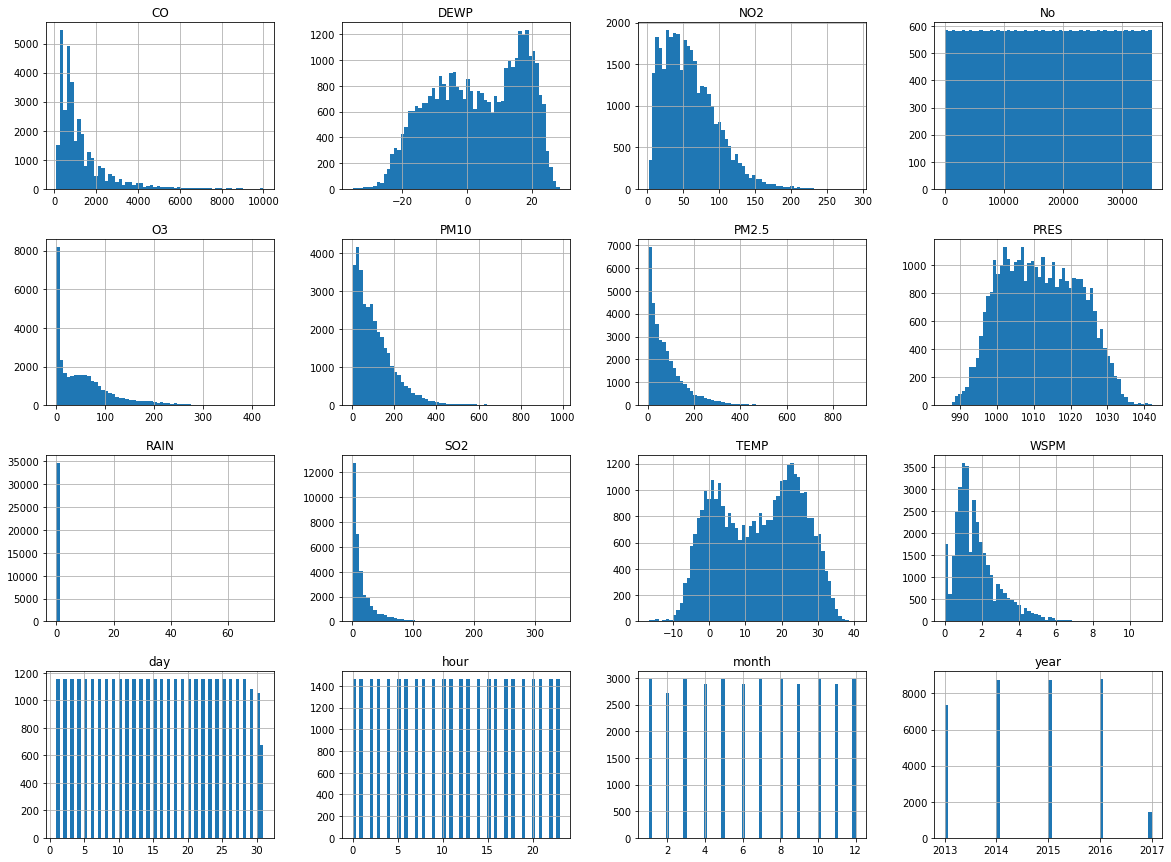

In [6]:
df.hist(bins=60,figsize=(20,15))

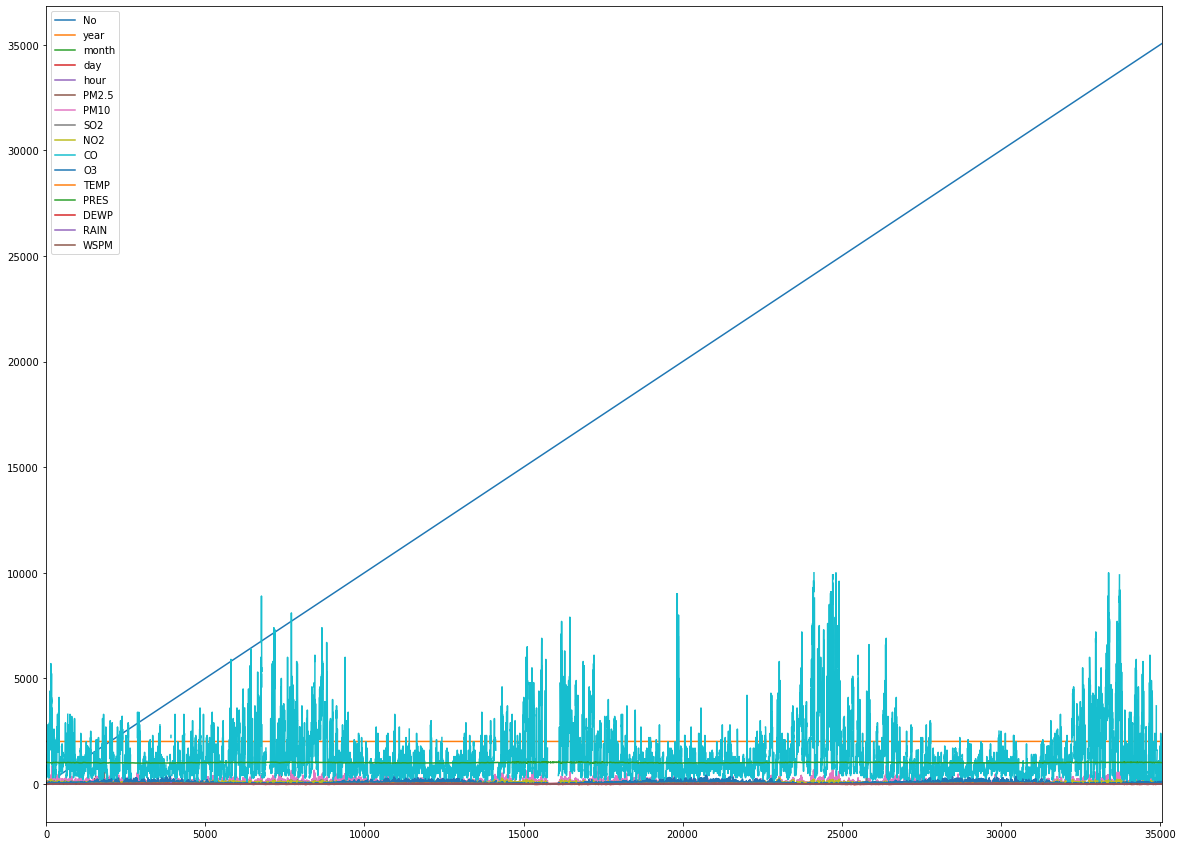

In [7]:
df.plot(figsize=(20,15))

In [8]:
from mpl_toolkits import mplot3d

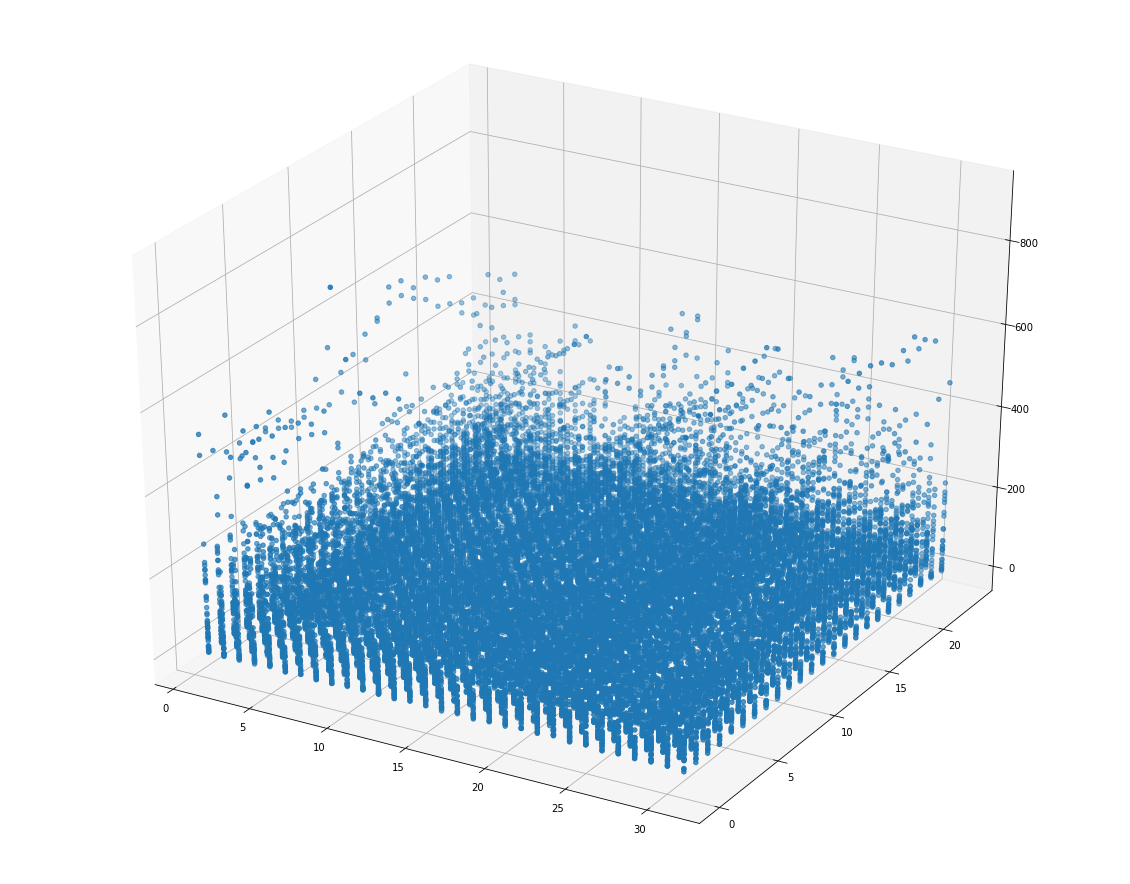

In [9]:
fig = plt.figure(figsize = (20,16))
ax = plt.axes(projection = '3d')
fg = ax.scatter3D(df['day'] , df['hour'] , df['PM2.5'])

In [10]:
len(df[df.hour.isnull()])

0

In [11]:
len(df[df['hour'].isna()])

0

In [12]:
df.shape

(35064, 18)

In [13]:
df = df.iloc[: , [11,16]].values

In [14]:
df

array([[-0.7,  4.4],
       [-1.1,  4.7],
       [-1.1,  5.6],
       ...,
       [10.8,  1.1],
       [10.5,  1.2],
       [ 8.6,  1.3]])

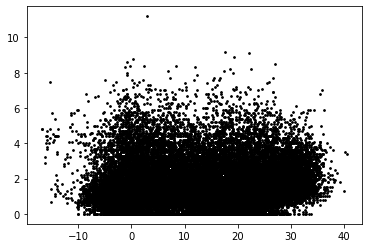

In [15]:
plt.scatter(df[: , 0] , df[: , 1] , s = 3 , color = "black")

In [16]:
from sklearn.cluster import KMeans

In [17]:
df_new = df[np.isfinite(df).all(1)]

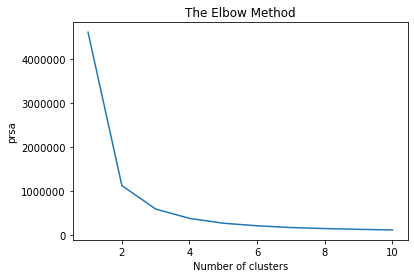

In [18]:
prsa = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i ,
    init = 'k-means++',max_iter = 300 , n_init = 10)
    kmeans.fit(df_new)
    prsa.append(kmeans.inertia_)
plt.plot(range(1,11) , prsa)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("prsa")
plt.show()

In [18]:
from sklearn.cluster import DBSCAN

In [19]:
dbscan = DBSCAN(eps = 5 , min_samples = 5)

In [20]:
labels = dbscan.fit_predict(df_new)

In [21]:
np.unique(labels)

array([0], dtype=int64)

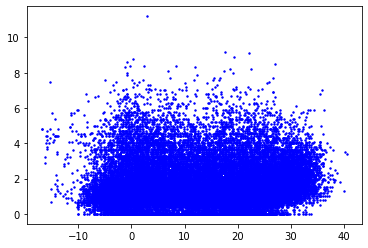

In [22]:
plt.scatter(df_new[labels == -1, 0], df_new[labels == -1, 1], s=2, c = "cyan")
plt.scatter(df_new[labels == 0, 0], df_new[labels == 0, 1], s=2, c = "blue")
plt.scatter(df_new[labels == 1, 0], df_new[labels == 1, 1], s=2, c = "yellow")
plt.scatter(df_new[labels == 2, 0], df_new[labels == 2, 1], s=2, c = "green")
plt.scatter(df_new[labels == 3, 0], df_new[labels == 3, 1], s=2, c = "red")
plt.scatter(df_new[labels == 4, 0], df_new[labels == 4, 1], s=2, c = "black")
plt.scatter(df_new[labels == 5, 0], df_new[labels == 5, 1], s=2, c = "purple")
plt.scatter(df_new[labels == 6, 0], df_new[labels == 6, 1], s=2, c = "grey")
plt.scatter(df_new[labels == 7, 0], df_new[labels == 7, 1], s=2, c = "pink")
plt.scatter(df_new[labels == 8, 0], df_new[labels == 8, 1], s=2, c = "orange")
plt.scatter(df_new[labels == 9, 0], df_new[labels == 9, 1], s=2, c = "brown")
plt.scatter(df_new[labels == 10, 0], df_new[labels == 10, 1], s=2, c = "silver")